<a href="https://colab.research.google.com/github/shanthan5327/ML_Models/blob/main/cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/kaggle/

In [ ]:
!ls /root/kaggle/


ls: cannot access '/root/kaggle/': No such file or directory


In [ ]:
!mkdir -p /root/.kaggle/


In [ ]:
!mv kaggle.json /root/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators (used when huge amount of data is used)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 109ms/step - loss: 1.2954 - accuracy: 0.5856 - val_loss: 0.6793 - val_accuracy: 0.6490
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5644 - accuracy: 0.7147 - val_loss: 0.5203 - val_accuracy: 0.7464
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4832 - accuracy: 0.7717 - val_loss: 0.4661 - val_accuracy: 0.7788
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4232 - accuracy: 0.8037 - val_loss: 0.4497 - val_accuracy: 0.7964
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3610 - accuracy: 0.8389 - val_loss: 0.4324 - val_accuracy: 0.7988
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2892 - accuracy: 0.8751 - val_loss: 0.4305 - val_accuracy: 0.8170
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2192 - accuracy: 0.9114 - val_loss: 0.4763 - val_ac

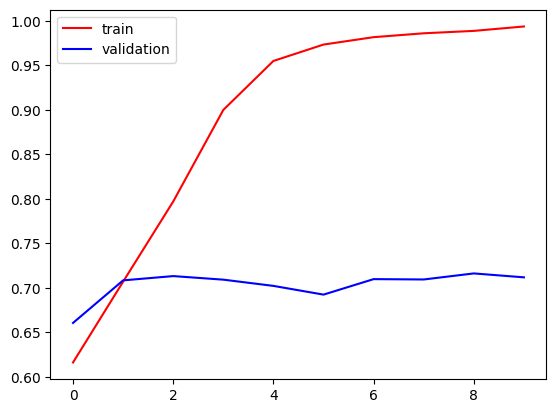

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

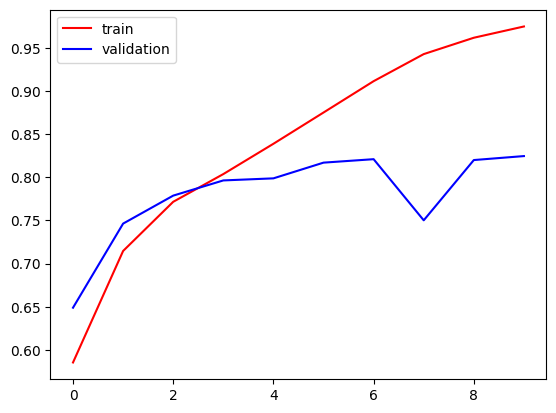

In [ ]:
#after applying batchnorm and dropout
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

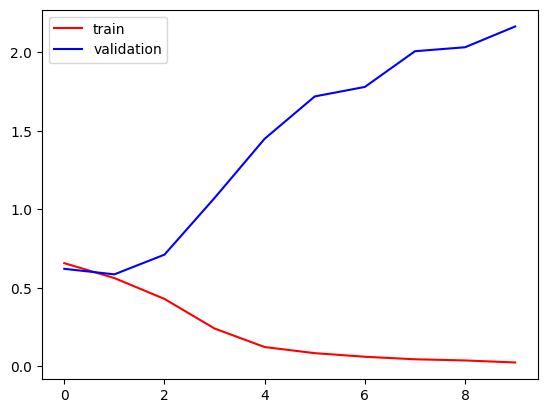

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

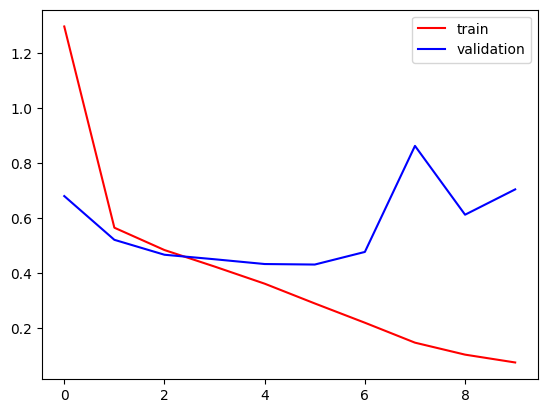

In [ ]:
#after batchnorm and dropout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#steps to reduce overfitting

# add more data
# data augmentation
# L1/L2 regularizers
# dropout
# batch norm
# reduce complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/dog.jpg')

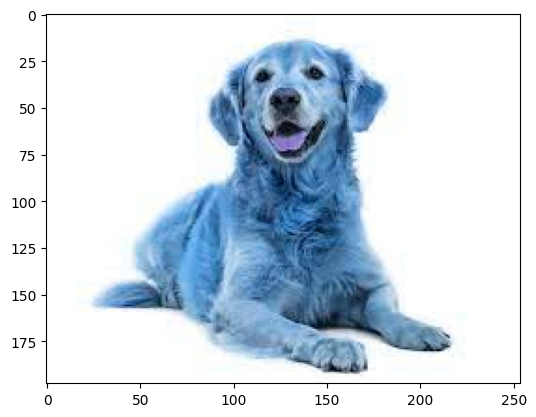

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(198, 254, 3)

In [ ]:
test_img = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 548ms/step


array([[1.]], dtype=float32)